In [1]:
from ROOT import TFile, gDirectory
import ROOT as r
import os

Welcome to JupyROOT 6.16/00


In [2]:
%%time
#test if kernel is running

print('running')

running
CPU times: user 115 µs, sys: 34 µs, total: 149 µs
Wall time: 251 µs


Build files into TChain

In [5]:
%%time
filename = 'ttbar_nonallhad_HF_PhPy8_AFII_mc16a.root'
treename = 'nominal_Loose'

list_of_files = os.listdir('../data_ttbar/')
data_files = [f for f in list_of_files if 'data' in f]
mc_files = [ 'ttbar_nonallhad_incl_PhPy8_AFII_mc16a.root', 'ttbar_nonallhad_incl_PhPy8_AFII_mc16d.root','ttbar_nonallhad_incl_PhPy8_AFII_mc16e.root',
            'ttX_mc16e.root','ttX_mc16d.root','ttX_mc16a.root',
            'vjets_Sherpa_mc16e.root','vjets_Sherpa_mc16d.root', 'vjets_Sherpa_mc16a.root',
            'singleTop_mc16e.root','singleTop_mc16d.root','singleTop_mc16a.root',
            'multiV_mc16a.root','multiV_mc16d.root','multiV_mc16e.root']
#data_files = ['data15_AllYear.root']
#mc_files = ['ttbar_nonallhad_HF_PhPy8_AFII_mc16d.root']

data_chain = r.TChain(treename)
mc_chain = r.TChain(treename)

for f in data_files:
    data_chain.Add('../data_ttbar/'+f)
for f in mc_files:
    mc_chain.Add('../data_ttbar/'+ f)

data_entries = data_chain.GetEntries()
mc_entries = mc_chain.GetEntries()

print(f'There are {data_entries} data events and {mc_entries} mc events')

There are 3223533 data events and 23130773 mc events
CPU times: user 45.9 ms, sys: 6.61 ms, total: 52.5 ms
Wall time: 60.2 ms


In [6]:
#use lum = 140
def GetWeight(lumi,tree):
    return lumi * 1000 * tree.weight_normalise *  tree.weight_mc *  tree.weight_pileup *tree.weight_leptonSF *  tree.weight_bTagSF_MV2c10_77 *  tree.weight_jvt

Initialize histograms

In [17]:
#####
#Set Up Code
#####

met_mc = r.TH1D('met_mc', 'E^{T}_{miss}', 100, 0, .8*10**6)
jet_pt_mc = r.TH1D('jet_pt_mc', 'jet_{pt}', 100, 0, 1.5*10**6)
met_data = r.TH1D('met_data', 'E^T_{miss}', 100, 0, .8*10**6)
jet_pt_data = r.TH1D('jet_pt_data', 'jet_{pt}', 100, 0, 1.5*10**6)
mu_pt_mc = r.TH1D('mu_pt_mc', '\mu_{pt}', 100, 0, 800*10**3)
mu_pt_data = r.TH1D('mu_pt_data', '\mu_{pt}', 100, 0, 800*10**3)
ht_all_mc = r.TH1D('ht_all_mc', '\mu_{pt}', 100, 0, 4000*10**3)
ht_all_data = r.TH1D('ht_all_data', '\mu_{pt}', 100, 0, 4000*10**3)


Warning in <TROOT::Append>: Replacing existing TH1: met_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: jet_pt_data (Potential memory leak).


Fill histograms

In [16]:
%%time
for jentry in range(mc_entries):
    nb = mc_chain.GetEntry(jentry)
    
    if nb<=0: continue
        
    #if (): continue
    
    
 
    jet_pt = mc_chain.jet_pt[0]
    met = mc_chain.met_met
    
    weight = GetWeight(104, mc_chain)

    met_mc.Fill(met,weight)
    jet_pt_mc.Fill(jet_pt, weight)


CPU times: user 1.05 s, sys: 39.7 ms, total: 1.09 s
Wall time: 1.09 s


In [10]:
%%time
for jentry in range(data_entries):
    nb = data_chain.GetEntry(jentry)
    
    if nb<=0: continue
        
    #if (): continue
    
    
 
    jet_pt = data_chain.jet_pt[0]
    

    met = data_chain.met_met
  
    met_data.Fill(met)
    jet_pt_data.Fill(jet_pt)


CPU times: user 1min 53s, sys: 8.01 s, total: 2min 1s
Wall time: 2min 8s


Plot and draw settings

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


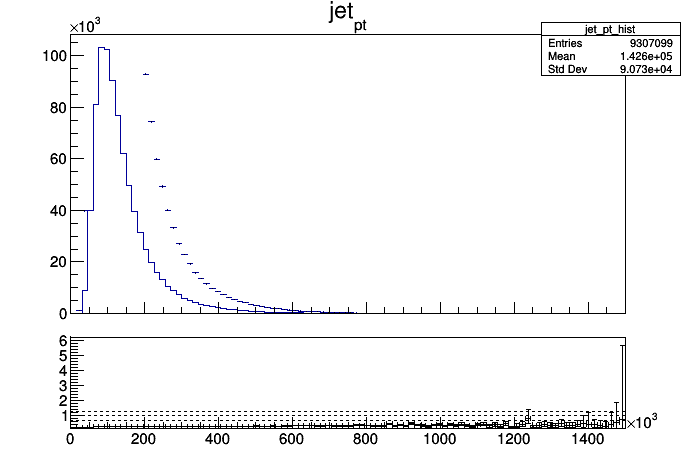

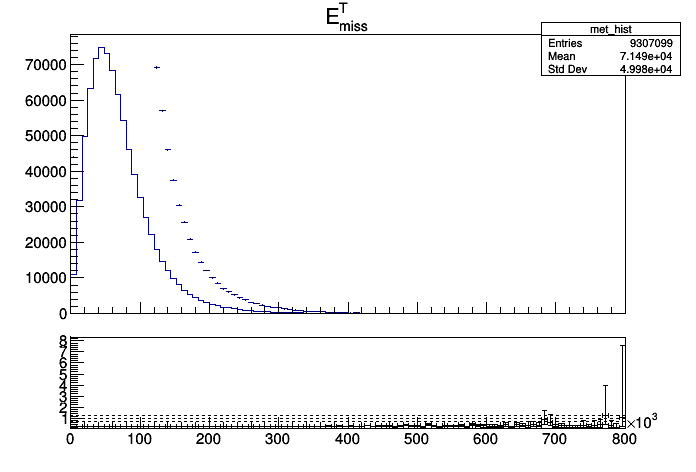

In [12]:
###
#Wrap Up
####
c = r.TCanvas()
jet_pt_hist.Sumw2()
jet_pt_data.Sumw2()
rp_jet_pt = r.TRatioPlot(jet_pt_hist, jet_pt_data)
rp_jet_pt.Draw()
c.Draw()

c2 = r.TCanvas()
met_hist.Sumw2()
met_data.Sumw2()
rp_met = r.TRatioPlot(met_hist, met_data)

rp_met.Draw()

c2.Draw()

dont mix HF with inc

v is vector boston

ttX is maybe tt +W,Z

plot on logy scale and test that 